# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle as w
import scaling as s
from random import sample
import matplotlib.ticker as mtick
# remove warnings
import warnings
warnings.filterwarnings("ignore")

# Acquire Data


In [2]:
df = w.get_zillow_data()
df

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate,price_per_sqft,age
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,LA,0.023417,81.592348,12.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,LA,0.012085,523.314815,6.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,LA,0.012253,311.391430,91.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,LA,0.017192,4.440000,45.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,LA,0.036874,40.467836,44.0
...,...,...,...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,LA,0.032854,96.548571,2.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,Orange,0.014046,424.737401,2.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,Orange,0.011648,171.429805,3.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,Orange,0.012496,214.971125,2.0


In [3]:
col_list = ['bedrooms', 'bathrooms', 'area', 'taxvalue', 'yearbuilt', 'taxamount', 'tax_rate', 'price_per_sqft', 'age']
df = w.remove_outliers(df, 4, col_list)
df

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate,price_per_sqft,age
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,LA,0.012085,523.314815,6.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,LA,0.012253,311.391430,91.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,LA,0.017192,4.440000,45.0
15,0.0,0.0,203.0,14166.0,1960.0,163.79,LA,0.011562,69.783251,57.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,LA,0.014946,136.230707,67.0
...,...,...,...,...,...,...,...,...,...,...
2152855,3.0,2.5,1809.0,405547.0,2012.0,4181.10,Orange,0.010310,224.182974,5.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,Orange,0.014046,424.737401,2.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,Orange,0.011648,171.429805,3.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,Orange,0.012496,214.971125,2.0


# Prepare Data

In [4]:
# split data
col =['bedrooms', 'bathrooms', 'area', 'taxvalue', 'yearbuilt', 'taxamount', 'county', 'tax_rate', 'price_per_sqft', 'age']
col_scaled = ['bedrooms', 'bathrooms', 'area', 'taxvalue', 'yearbuilt', 'taxamount', 'tax_rate', 'price_per_sqft', 'age']
train, validate, test, train_scaled, validate_scaled, test_scaled = s.split_scale(df,col, col_scaled)


In [5]:
# Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.
sample = train.sample(frac=.01, random_state=123)
def plot_variable_pairs(df):
    sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}})
    plt.show()

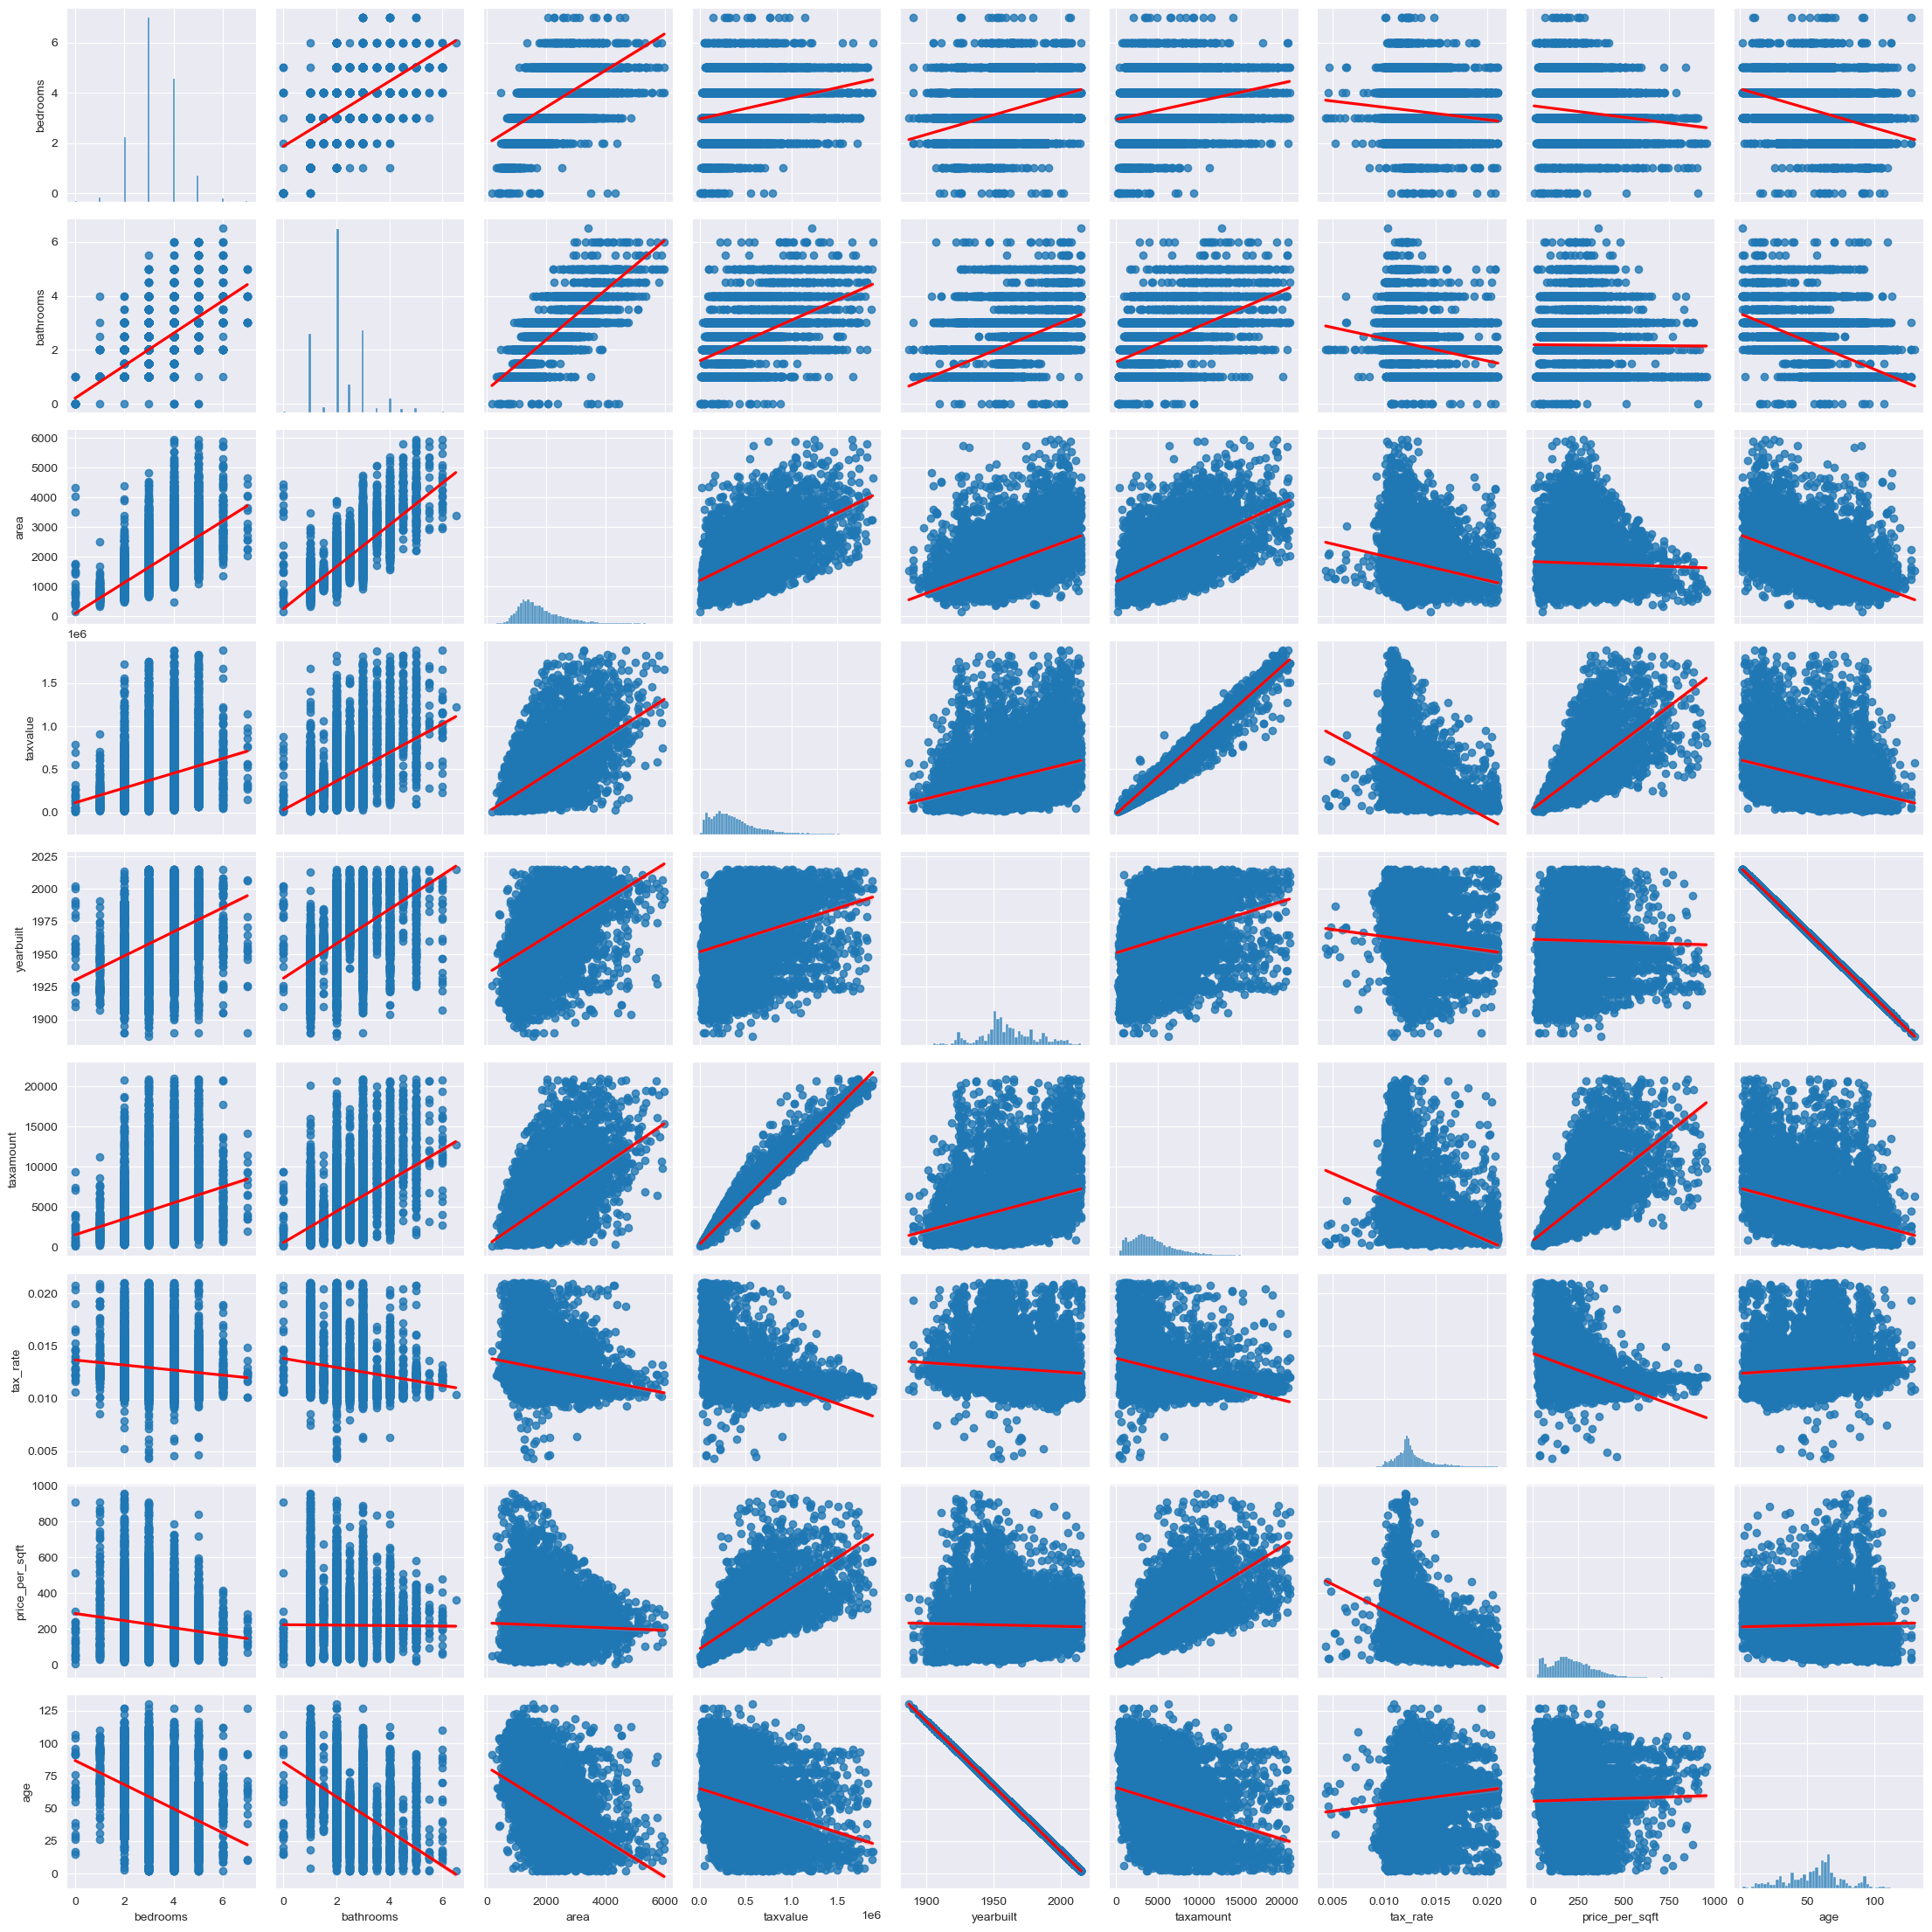

In [6]:
plot_variable_pairs(sample)

In [7]:
# Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.
def plot_categorical_and_continuous_vars(df, cat, cont):
    plt.figure(figsize=(16, 3))
    plt.subplot(131)
    sns.boxplot(data=df, y=cont, x=cat)
    plt.subplot(132)
    sns.barplot(data=df, y=cont, x=cat)
    plt.subplot(133)
    sns.histplot(data=df, x=cont, hue=cat, multiple='stack')

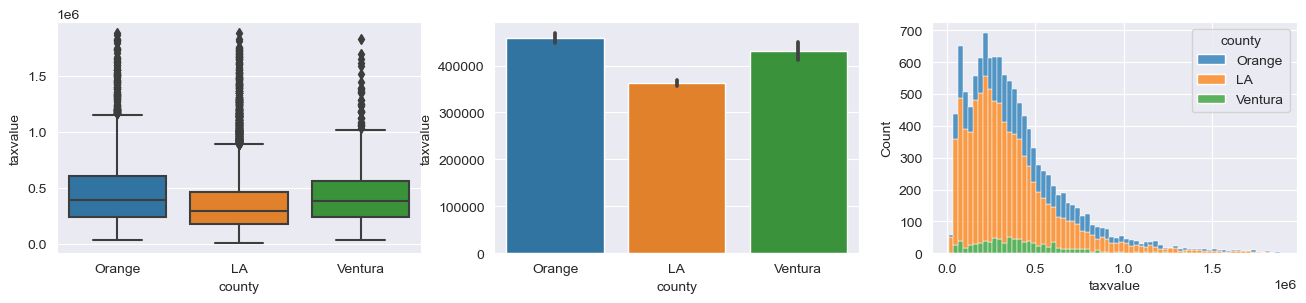

In [8]:
plot_categorical_and_continuous_vars(sample, 'county', 'taxvalue')

# Hypothesis
$H_0$: There is no linear correlation between the number of bedrooms and the tax value of the home.

$H_a$: There is a linear correlation between the number of bedrooms and the tax value of the home.


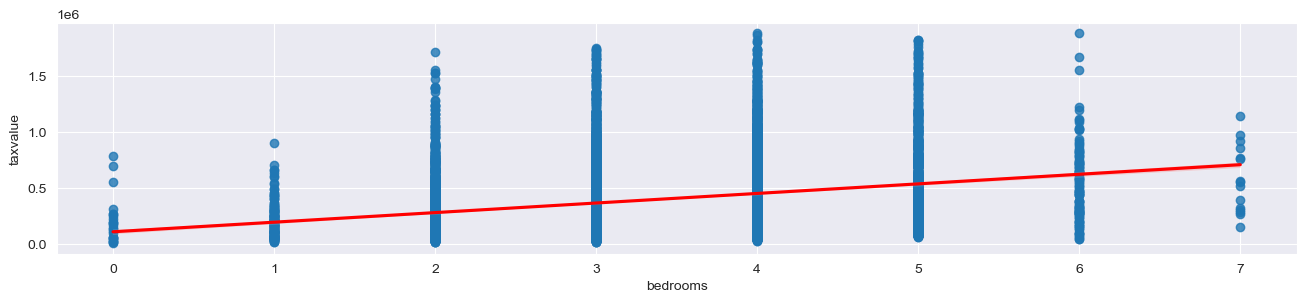

In [9]:
# plot the correlation between the number of bedrooms and the tax value of the home
plt.figure(figsize=(16, 3))
sns.regplot(data=sample, y='taxvalue', x='bedrooms', line_kws={'color':'red'})
plt.show()


In [10]:
# stats test
from scipy import stats
x = train.bedrooms
y = train.taxvalue
r, p = stats.pearsonr(x, y)
print(f'r = {r:.4f}')

r = 0.2769


In [11]:
# p value is less than alpha, reject the null hypothesis
alpha = .05
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


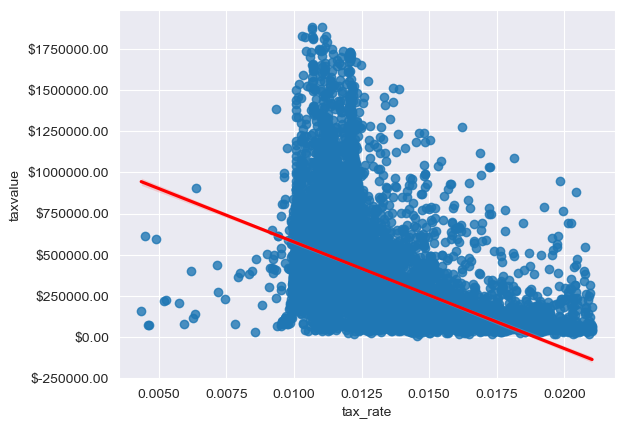

In [12]:
# taxrate and taxvalue
ax = sns.regplot(data=sample, y='taxvalue', x='tax_rate', line_kws={'color':'red'})
ax.yaxis.set_major_formatter('${x:1.2f}')
plt.show()


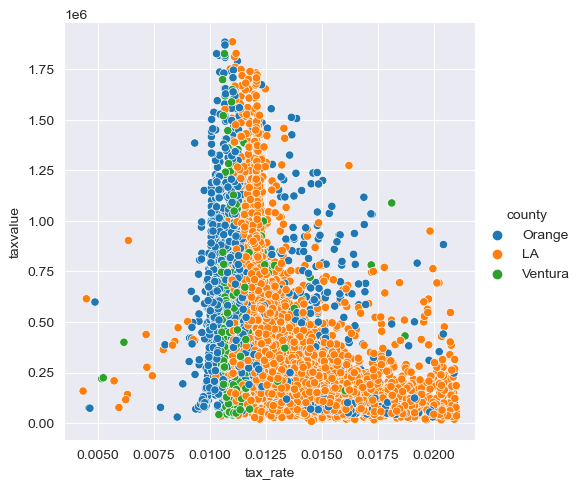

In [13]:
# taxrate vs taxvalue hue county
sns.relplot(data=sample, y='taxvalue', x='tax_rate', hue='county')
plt.show()

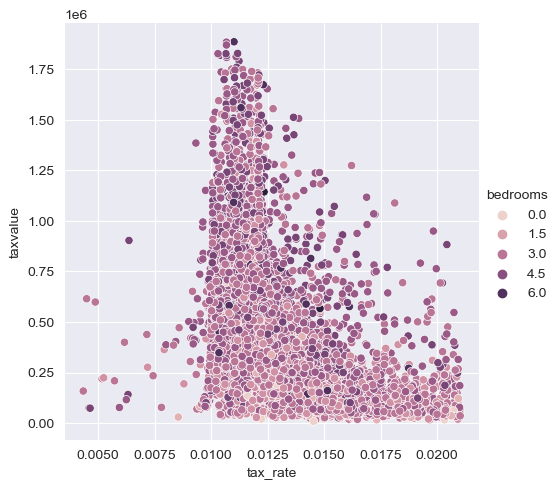

In [14]:
# taxrate vs taxvalue hue bedrooms
sns.relplot(data=sample, y='taxvalue', x='tax_rate', hue='bedrooms')
plt.show()

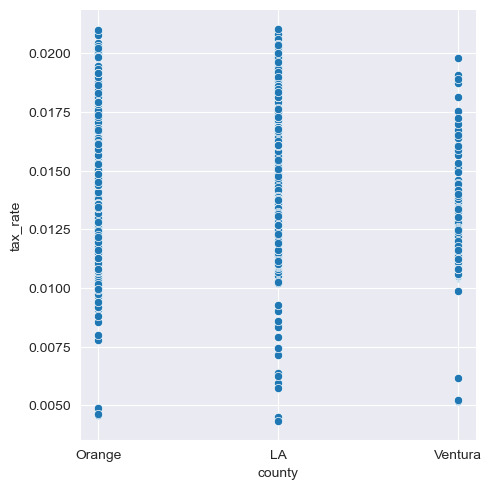

In [15]:
# taxrate vs county
sns.relplot(data=sample, y='tax_rate', x='county')
plt.show()

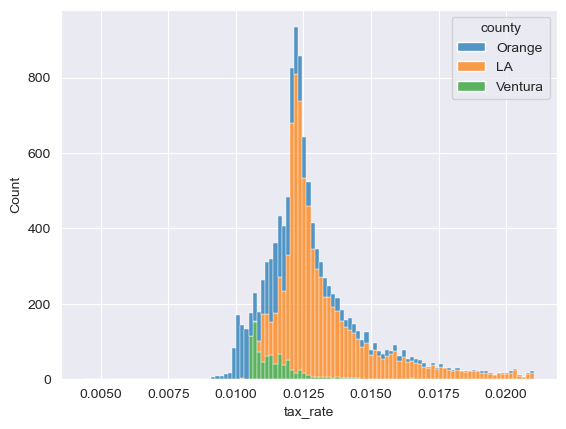

In [16]:
# visualize the distribution of tax rates
sns.histplot(data=sample, x='tax_rate', hue='county', multiple='stack')
plt.show()

<Axes: xlabel='tax_rate', ylabel='Density'>

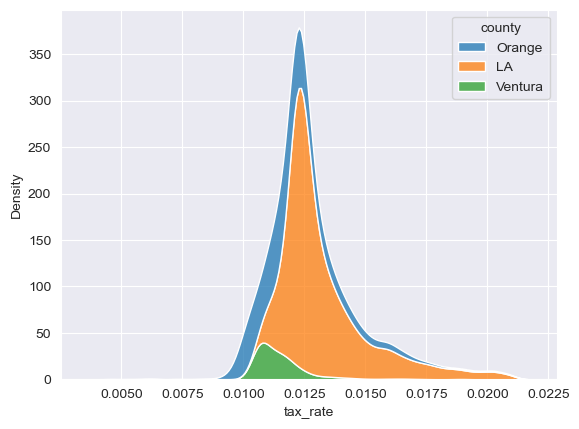

In [17]:
# visualize the distribution of tax rates
sns.kdeplot(data=sample, x='tax_rate', hue='county', multiple='stack')

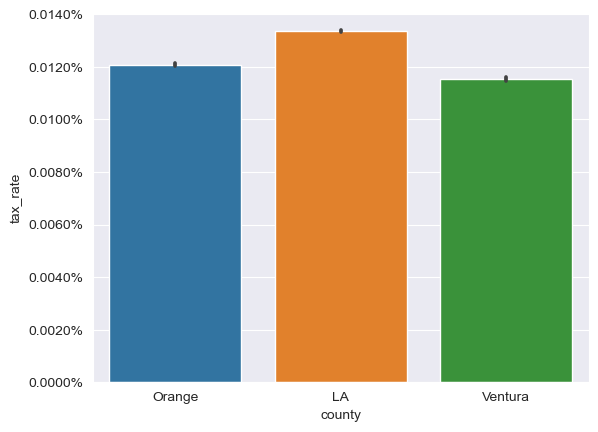

In [18]:
ax = sns.barplot(data=sample, y='tax_rate', x='county')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

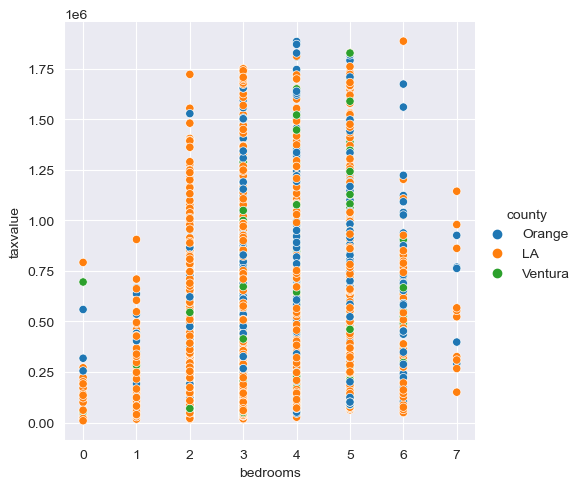

In [19]:
# bedrooms vs taxvalue
sns.relplot(data=sample, y='taxvalue', x='bedrooms', hue='county')
plt.show()

<Axes: xlabel='bedrooms', ylabel='taxvalue'>

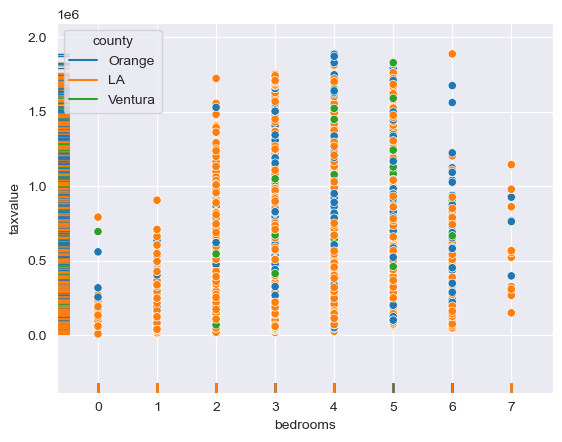

In [20]:

sns.scatterplot(data=sample, y='taxvalue', x='bedrooms', hue='county')
sns.rugplot(data=sample, y='taxvalue', x='bedrooms', hue='county')

<Axes: xlabel='tax_rate', ylabel='taxvalue'>

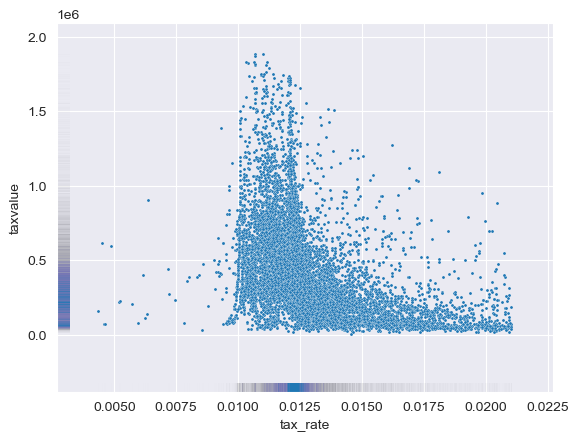

In [21]:

sns.scatterplot(data=sample, x="tax_rate", y="taxvalue", s=5)
sns.rugplot(data=sample, x="tax_rate", y="taxvalue", lw=1, alpha=.005)

<Axes: xlabel='tax_rate', ylabel='taxvalue'>

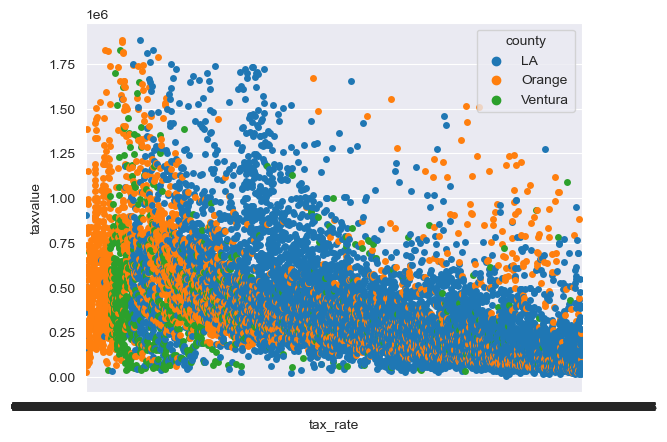

In [22]:
sns.stripplot(data=sample, x="tax_rate", y="taxvalue", hue='county', jitter=.5)

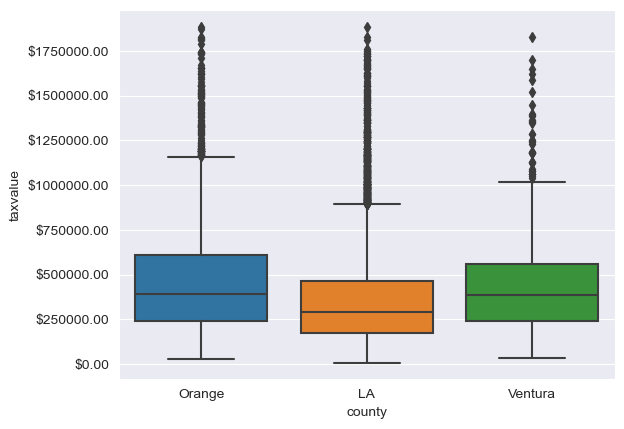

In [23]:
# value by county
ax = sns.boxplot(data=sample, y='taxvalue', x='county')
ax.yaxis.set_major_formatter('${x:1.2f}')


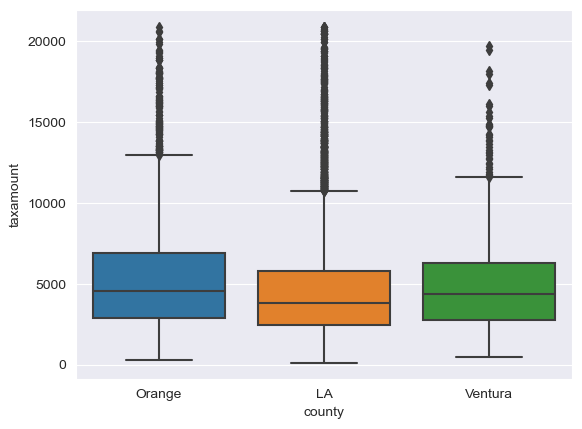

In [24]:
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
# tax_rate by county
ax = sns.boxplot(data=sample, y='taxamount', x='county')

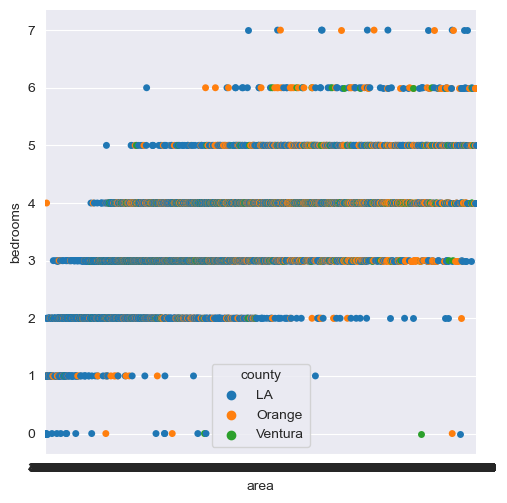

In [ ]:
# bedrooms by sqft
ax = sns.catplot(data=sample, y='bedrooms', x='area', hue='county')


<Axes: xlabel='age', ylabel='county'>

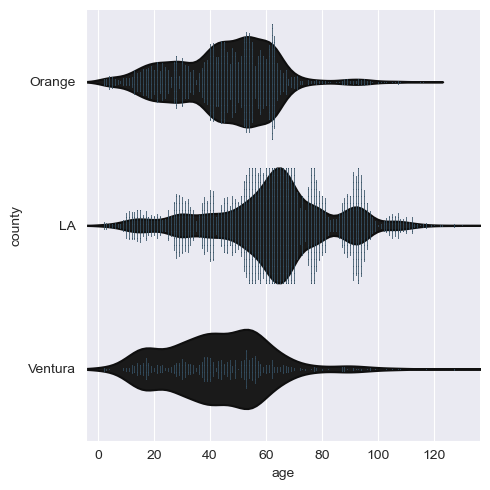

In [50]:
sample1 = train.sample(frac=.001, random_state=123)
sns.catplot(data=sample, x="age", y="county", kind="violin", color=".1", inner=None)
sns.swarmplot(data=sample, x="age", y="county", size=.6)

<Axes: xlabel='age', ylabel='county'>

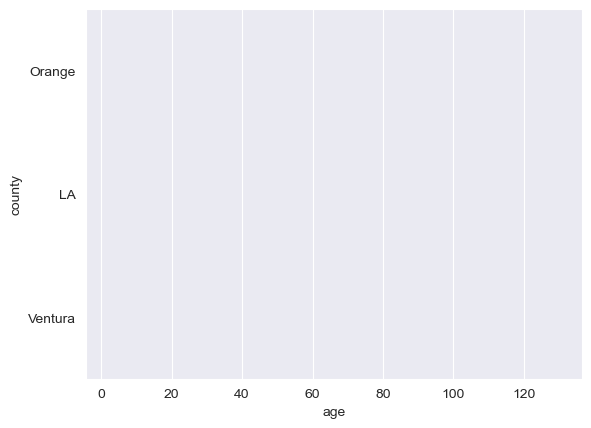

In [45]:
sns.swarmplot(data=sample, x="age", y="county", size=.01)

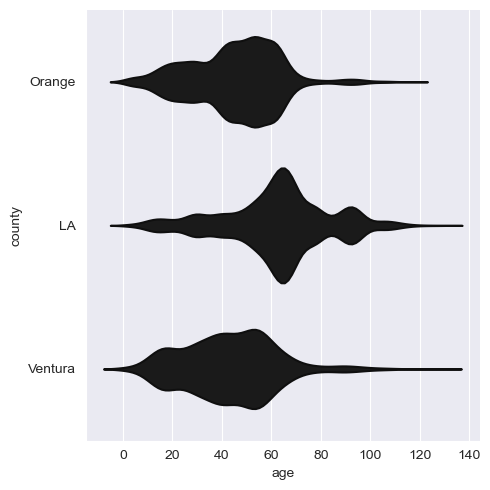

In [32]:

ax = sns.catplot(data=sample, x="age", y="county", kind="violin", color=".1", inner=None)


In [ ]:
sns.catplot(data=sample, x="age", y="county", kind="violin", color=".1", inner=None)

In [ ]:
ax = sns.catplot(data=sample, x="age", y="county", kind="violin", color=".1", inner=None)


In [ ]:
ax = sns.catplot(data=sample, x="age", y="county", kind="violin", color=".1", inner=None)

In [ ]:
# age vs taxvalue
ax = sns.catplot(data=sample, x="age", y="taxvalue", kind="violin", color=".1", inner=None)

In [ ]:
# sample couty la vs taxvalue
ax = sns.catplot(data=sample, x="age", y="taxvalue", kind="violin", color=".1", inner=None, col='county')



In [ ]:
# joint plot taxvalue vs taxamount
sns.jointplot(data=sample, x='taxvalue', y='taxamount', hue='county')
